In [35]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
  

In [36]:
#first we load the csv file in which we have saved our scraped data from cars24
df=pd.read_csv(r'file:///C:\Users\anand\5000%20cars%20data.csv')
df

,Unnamed: 0,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI,down payment
0,0,Maruti Swift Dzire,VXI Manual,2010.0,DL-7C,Petrol,1st Owner,"29,667 km","₹2,51,299","₹4,913/month",Zero Down Payment
1,1,Hyundai Grand i10,SPORTZ 1.2 KAPPA VTVT Manual,2018.0,UP-16,Petrol,2nd Owner,"6,875 km","₹5,26,599","₹10,295/month",Zero Down Payment
2,2,Maruti Swift,LXI Manual,2020.0,DL-3C,Petrol,1st Owner,"11,067 km","₹5,65,199","₹11,050/month",Zero Down Payment
3,3,Maruti Wagon R 1.0,VXI Manual,2013.0,DL-13,Petrol,1st Owner,"35,519 km","₹2,78,499","₹5,445/month",Zero Down Payment
4,4,Maruti Swift,LXI Manual,2020.0,HR-51,Petrol,2nd Owner,"16,633 km","₹5,66,499","₹11,075/month",Zero Down Payment
...,...,...,...,...,...,...,...,...,...,...,...
5516,5516,Maruti Alto 800,VXI Manual,2015.0,UP-16,Petrol,1st Owner,"28,148 km","₹2,81,899","₹5,511/month",Zero Down Payment
5517,5517,Hyundai Grand i10,MAGNA 1.2 VTVT Manual,2016.0,DL-8C,Petrol + CNG,1st Owner,"46,894 km","₹3,98,799","₹7,797/month",Zero Down Payment
5518,5518,Toyota Etios Liva,G Manual,2014.0,DL-8C,Petrol,2nd Owner,"25,753 km","₹3,24,599","₹6,346/month",Zero Down Payment
5519,5519,Maruti Celerio,VXI CNG Manual,2018.0,DL-9C,Petrol + CNG,1st Owner,"61,414 km","₹5,06,299","₹9,898/month",Zero Down Payment


## Dataframe description:


as we can see that dataframe have 5521 rows and 11 columns. the dataframe has the data of dirrerent used cars of popular cities like delhi, bangalore, chennai, gurgaon, hyderabad, mumbai, pune, etc. it has 11 main column which is mostely used to select a cars and predict the prices like 'brand', 'model', 'manufacturing year', 'city/state', 'fuel type','owner', 'runs a km', 'price(target variable)', 'EMI', 'down payment'. 
    

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5521 entries, 0 to 5520
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5521 non-null   int64  
 1   Brand               4473 non-null   object 
 2   model               5521 non-null   object 
 3   manufacturing year  4473 non-null   float64
 4   city/state          4473 non-null   object 
 5   fuel                4473 non-null   object 
 6   owner               4473 non-null   object 
 7   km                  4473 non-null   object 
 8   price               5521 non-null   object 
 9   EMI                 4473 non-null   object 
 10  down payment        5521 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 474.6+ KB


In [38]:
df.sample(8)

,Unnamed: 0,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI,down payment
599,599,Honda WR-V,1.5 i-DTEC VX MT Manual,2018.0,UP-16,Diesel,1st Owner,"64,774 km","₹7,21,099","₹14,098/month",Zero Down Payment
2021,2021,Maruti Alto,LXI Manual,2012.0,AP-12,Petrol,2nd Owner,"41,338 km","₹2,15,199","₹4,207/month",Zero Down Payment
4614,4614,Ford Ecosport,1.0 TREND+ (ECOBOOST) Manual,2016.0,DL-10,Petrol,2nd Owner,"58,070 km","₹6,15,499","₹12,033/month",Zero Down Payment
3425,3425,NaN,1.4 LONGITUDE (O) AT Automatic,NaN,NaN,NaN,NaN,NaN,"₹19,22,799",NaN,Zero Down Payment
2474,2474,Maruti Swift,ZDI AMT Automatic,2018.0,TS-08,Diesel,1st Owner,"43,550 km","₹7,44,699","₹14,559/month",Zero Down Payment
4211,4211,NaN,VXI OPT Manual,NaN,NaN,NaN,NaN,NaN,"₹3,60,699",NaN,Zero Down Payment
2047,2047,Maruti Swift Dzire,VDI OPT Manual,2017.0,TS-08,Diesel,2nd Owner,"72,884 km","₹6,71,999","₹13,138/month",Zero Down Payment
3850,3850,NaN,SPORTZ 1.2 Manual,NaN,NaN,NaN,NaN,NaN,"₹4,92,199",NaN,Zero Down Payment


after loading the dataset we should clean our data 

## Data cleaning:

### check null values:

In [39]:
df.isnull()

,Unnamed: 0,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI,down payment
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5516,False,False,False,False,False,False,False,False,False,False,False
5517,False,False,False,False,False,False,False,False,False,False,False
5518,False,False,False,False,False,False,False,False,False,False,False
5519,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isnull().sum()

Unnamed: 0               0
Brand                 1048
model                    0
manufacturing year    1048
city/state            1048
fuel                  1048
owner                 1048
km                    1048
price                    0
EMI                   1048
down payment             0
dtype: int64

as we can see that our dataset has many null values, and the mainly null values there in brand, manufacturing year, city, fuel, owner, km and EMI and the no. are same.

<AxesSubplot:>

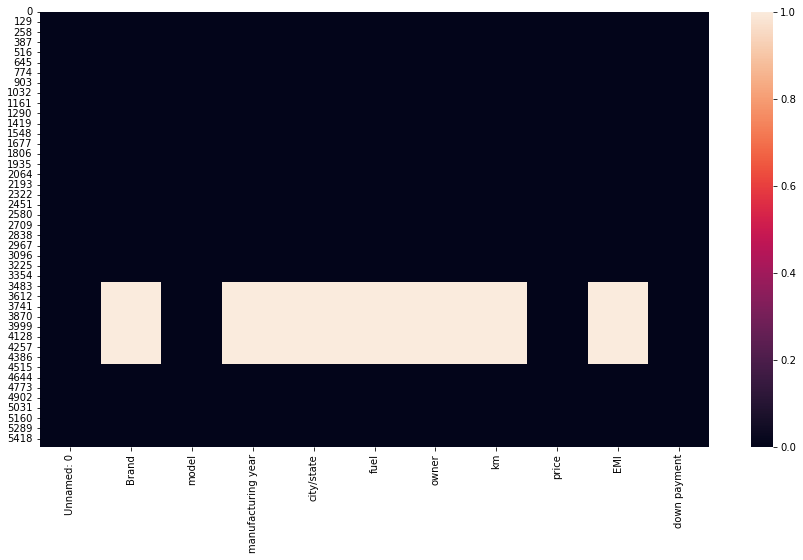

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

better to remove null columns because they are very large in no. so if we impute that column so it can affect the actual prediction and permormance of the model.

In [42]:
df.dropna(axis=0,inplace=True)


In [43]:
df

,Unnamed: 0,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI,down payment
0,0,Maruti Swift Dzire,VXI Manual,2010.0,DL-7C,Petrol,1st Owner,"29,667 km","₹2,51,299","₹4,913/month",Zero Down Payment
1,1,Hyundai Grand i10,SPORTZ 1.2 KAPPA VTVT Manual,2018.0,UP-16,Petrol,2nd Owner,"6,875 km","₹5,26,599","₹10,295/month",Zero Down Payment
2,2,Maruti Swift,LXI Manual,2020.0,DL-3C,Petrol,1st Owner,"11,067 km","₹5,65,199","₹11,050/month",Zero Down Payment
3,3,Maruti Wagon R 1.0,VXI Manual,2013.0,DL-13,Petrol,1st Owner,"35,519 km","₹2,78,499","₹5,445/month",Zero Down Payment
4,4,Maruti Swift,LXI Manual,2020.0,HR-51,Petrol,2nd Owner,"16,633 km","₹5,66,499","₹11,075/month",Zero Down Payment
...,...,...,...,...,...,...,...,...,...,...,...
5516,5516,Maruti Alto 800,VXI Manual,2015.0,UP-16,Petrol,1st Owner,"28,148 km","₹2,81,899","₹5,511/month",Zero Down Payment
5517,5517,Hyundai Grand i10,MAGNA 1.2 VTVT Manual,2016.0,DL-8C,Petrol + CNG,1st Owner,"46,894 km","₹3,98,799","₹7,797/month",Zero Down Payment
5518,5518,Toyota Etios Liva,G Manual,2014.0,DL-8C,Petrol,2nd Owner,"25,753 km","₹3,24,599","₹6,346/month",Zero Down Payment
5519,5519,Maruti Celerio,VXI CNG Manual,2018.0,DL-9C,Petrol + CNG,1st Owner,"61,414 km","₹5,06,299","₹9,898/month",Zero Down Payment


In [44]:
df.isnull().sum()

Unnamed: 0            0
Brand                 0
model                 0
manufacturing year    0
city/state            0
fuel                  0
owner                 0
km                    0
price                 0
EMI                   0
down payment          0
dtype: int64

no null values are there.

### check duplicates:

In [45]:
df.duplicated().sum()

0

##### dataframe has no duplicates values.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4473 entries, 0 to 5520
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4473 non-null   int64  
 1   Brand               4473 non-null   object 
 2   model               4473 non-null   object 
 3   manufacturing year  4473 non-null   float64
 4   city/state          4473 non-null   object 
 5   fuel                4473 non-null   object 
 6   owner               4473 non-null   object 
 7   km                  4473 non-null   object 
 8   price               4473 non-null   object 
 9   EMI                 4473 non-null   object 
 10  down payment        4473 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 419.3+ KB


In [50]:
df.nunique()

Unnamed: 0            4473
Brand                  128
model                  735
manufacturing year      14
city/state             232
fuel                     3
owner                    3
km                    3446
price                 3006
EMI                   2995
down payment             1
dtype: int64

### Visualisation:

In [53]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

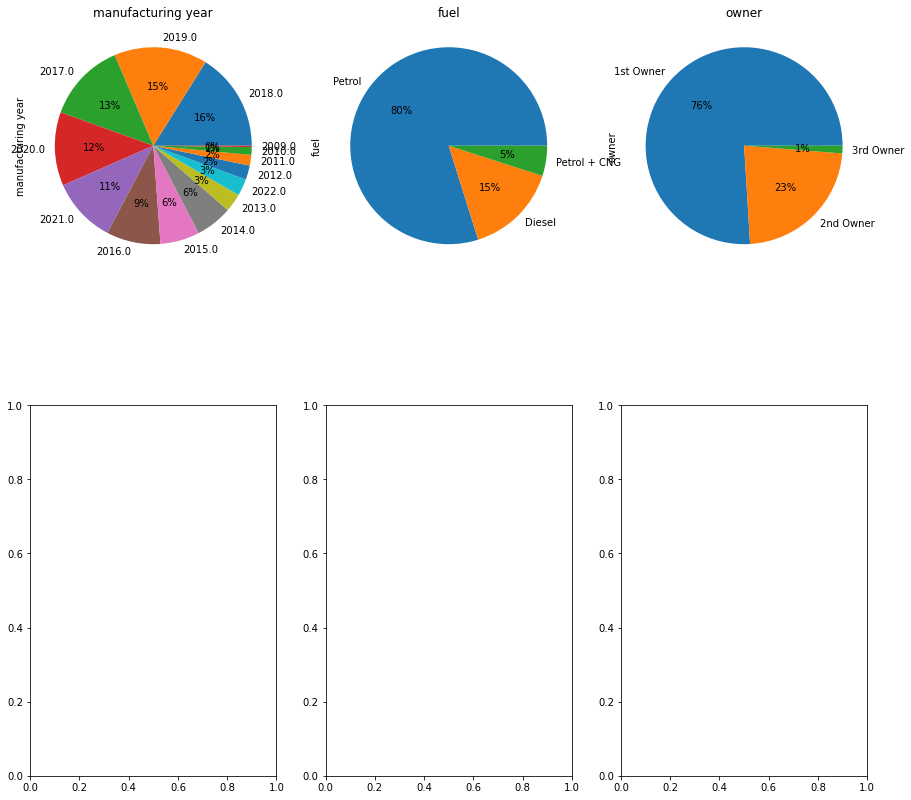

In [59]:
pie_plot(df, ['manufacturing year','fuel','owner'],2,3)

above graph shows that 2018 and 2019 models are more at selling and 1st owner cars are more set to sell it is of 75%, most of the cars are of petrol engine and only 5% are of cng+petrol.

In [62]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['Brand', 'model', 'city/state', 'fuel', 'owner', 'km', 'price', 'EMI', 'down payment']
Integer variables:
[]
Real variables:
['manufacturing year']


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

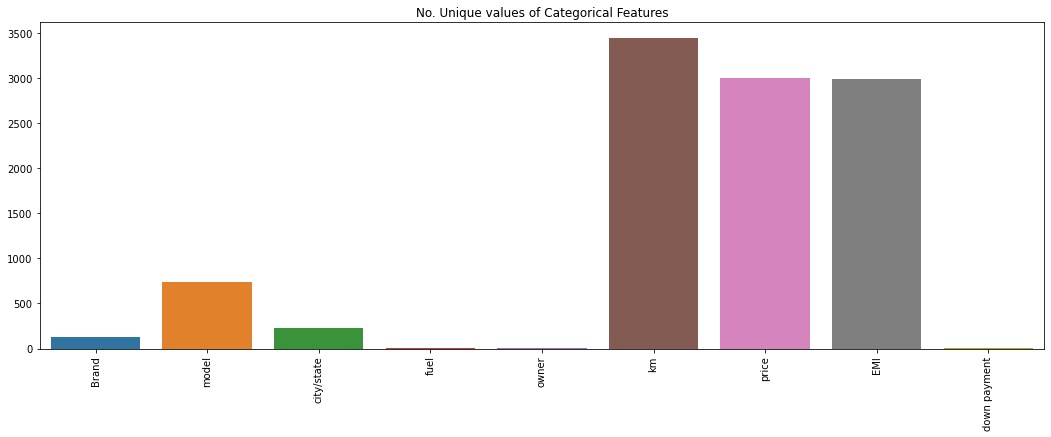

In [64]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

## Encoding technique:

In [65]:
df.columns

Index(['Unnamed: 0', 'Brand', 'model', 'manufacturing year', 'city/state',
       'fuel', 'owner', 'km', 'price', 'EMI', 'down payment'],
      dtype='object')

drop the unneccesory column.

In [67]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

df.drop(["down payment"],axis=1,inplace=True)

Label Encoding:
is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Label Encoding challenges:
there is a very high probability that the model captures the relationship between values like they were ordinal which isn't suitble for example for ocean proximity here.

In [69]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Brand']= label_encoder.fit_transform(df['Brand'])
df['model']= label_encoder.fit_transform(df['model'])
df['manufacturing year']= label_encoder.fit_transform(df['manufacturing year'])
df['city/state']= label_encoder.fit_transform(df['city/state'])
df['fuel']= label_encoder.fit_transform(df['fuel'])
df['owner']= label_encoder.fit_transform(df['owner'])
df['km']= label_encoder.fit_transform(df['km'])
df['EMI']= label_encoder.fit_transform(df['EMI'])
df['price']= label_encoder.fit_transform(df['price'])
df

,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI
0,79,586,1,30,1,0,1072,583,1964
1,29,488,9,217,1,1,2482,1705,79
2,78,362,11,26,1,0,79,1883,257
3,82,586,4,22,1,0,1373,638,2021
4,78,362,11,62,1,1,376,1889,263
...,...,...,...,...,...,...,...,...,...
5516,63,586,6,217,1,0,978,649,2032
5517,29,377,7,31,2,0,1887,1103,2473
5518,116,285,5,31,1,1,855,804,2174
5519,66,583,9,32,2,0,2539,1600,2969


As we all know a car's brand really affects it's price so we'll be also encoding car names into usable variables by the model this will increase the dataframe size but will be really relevant for our analysis.

### descriptive satatstics:

In [70]:
df.describe()

,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI
count,4473.000000,4473.000000,4473.00000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000
mean,58.360385,395.756986,8.55019,98.287056,0.897608,0.252850,1690.148670,1526.247038,1490.156718
std,30.009133,206.742354,2.70439,66.105636,0.437279,0.462606,997.217138,839.855975,893.690255
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,236.000000,7.00000,32.000000,1.000000,0.000000,826.000000,822.000000,696.000000
50%,64.000000,390.000000,9.00000,77.000000,1.000000,0.000000,1665.000000,1549.000000,1473.000000
75%,78.000000,586.000000,11.00000,146.000000,1.000000,0.000000,2552.000000,2223.000000,2282.000000
max,127.000000,734.000000,13.00000,231.000000,2.000000,2.000000,3445.000000,3005.000000,2994.000000


## Correlation:

In [71]:
df.corr()

,Brand,model,manufacturing year,city/state,fuel,owner,km,price,EMI
Brand,1.000000,0.369616,0.138481,-0.070128,0.034593,-0.046964,-0.037562,0.007437,0.030792
model,0.369616,1.000000,-0.022160,-0.022014,-0.010901,-0.007209,0.006389,-0.008929,0.055270
manufacturing year,0.138481,-0.022160,1.000000,0.102283,0.008128,-0.185757,-0.251216,0.198758,-0.247548
city/state,-0.070128,-0.022014,0.102283,1.000000,-0.117216,0.023723,0.065831,-0.001021,-0.057717
fuel,0.034593,-0.010901,0.008128,-0.117216,1.000000,-0.026745,-0.126131,0.060010,0.035726
owner,-0.046964,-0.007209,-0.185757,0.023723,-0.026745,1.000000,0.081470,-0.017081,0.021780
km,-0.037562,0.006389,-0.251216,0.065831,-0.126131,0.081470,1.000000,-0.033114,0.038092
price,0.007437,-0.008929,0.198758,-0.001021,0.060010,-0.017081,-0.033114,1.000000,-0.492001
EMI,0.030792,0.055270,-0.247548,-0.057717,0.035726,0.021780,0.038092,-0.492001,1.000000


<AxesSubplot:>

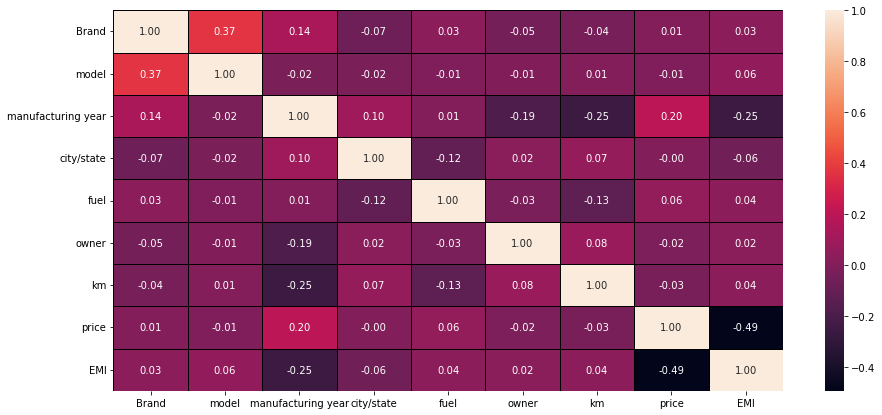

In [72]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

array([[<AxesSubplot:title={'center':'Brand'}>,
        <AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'manufacturing year'}>],
       [<AxesSubplot:title={'center':'city/state'}>,
        <AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'owner'}>],
       [<AxesSubplot:title={'center':'km'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'EMI'}>]], dtype=object)

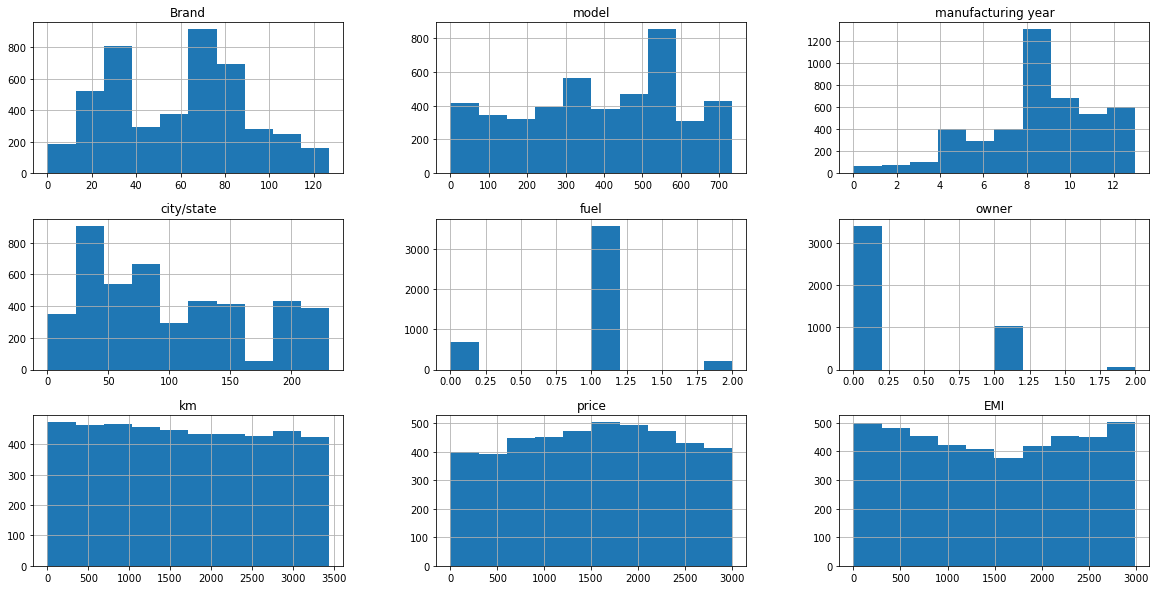

In [73]:
df.hist(figsize=[20,10])

## outliers:

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.
Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [75]:
df.columns

Index(['Brand', 'model', 'manufacturing year', 'city/state', 'fuel', 'owner',
       'km', 'price', 'EMI'],
      dtype='object')

In [77]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df[l], palette="flare")

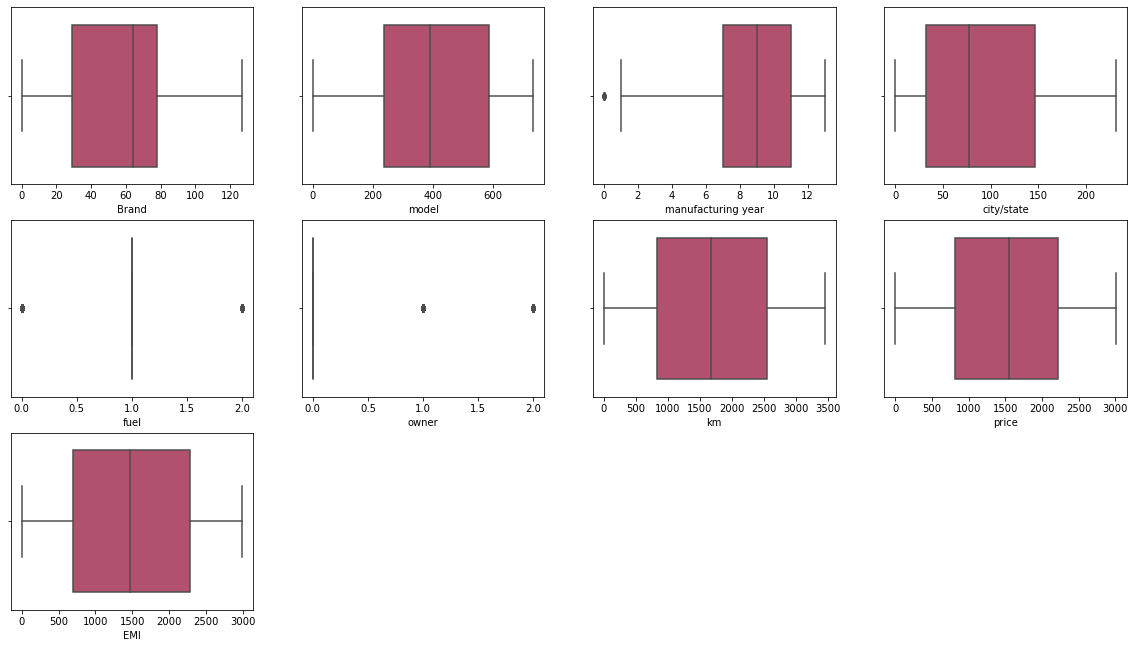

In [78]:
box_plot(['Brand', 'model', 'manufacturing year', 'city/state', 'fuel', 'owner',
       'km', 'price', 'EMI'])

Note:
Don't get confused about the outliers in the dataset as they are happenning due to exotic cars for special tasks with high performance so we will not be discarding them.

### Summary of Data Preprocessing:
The data went through the process of cleaning as follows:

Explored and visualized the data
Handled categorical data encoding using label encoder which is more suitble for the case

## splitting variable:

In [79]:
x=df.drop(columns=['price'],axis=1)
y=df['price']

In [80]:
x.shape,y.shape

((4473, 8), (4473,))

## Transforming the data:

In [81]:
x=power_transform(x,method='yeo-johnson')

In [82]:
type(x)

numpy.ndarray

In [83]:
x.ndim

2

In [84]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.71744334,  0.91037237, -2.19534735, ..., -0.56245139,
        -0.50797112,  0.58711716],
       [-0.95115378,  0.46694968,  0.0737412 , ...,  1.77505033,
         0.80599808, -1.87002039],
       [ 0.68806561, -0.12011053,  0.94863842, ..., -0.56245139,
        -1.92110388, -1.48141333],
       ...,
       [ 1.7379125 , -0.49112676, -1.32961876, ...,  1.77505033,
        -0.75106257,  0.78288181],
       [ 0.32605769,  0.8969426 ,  0.0737412 , ..., -0.56245139,
         0.85302962,  1.47368711],
       [ 0.29503183, -0.9361879 ,  0.0737412 , ..., -0.56245139,
        -0.80737915, -1.12656646]])

In [85]:
x.mean()

-1.429663452233602e-17

In [86]:
x.std()

0.9999999999999999

In [87]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

In [88]:
x_train.shape,y_train.shape

((3354, 8), (3354,))

In [89]:
x_test.shape,y_test.shape

((1119, 8), (1119,))

## Model building:

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data. Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

### linear regression:

Linear regression is a supervised machine learning method that is used by the Train Using AutoML tool and finds a linear equation that best describes the correlation of the explanatory variables with the dependent variable. 

In [90]:
LR=LinearRegression()
LR.fit(x_test,y_test)
y_pred=LR.predict(x_test)
y_pred.shape

(1119,)

In [91]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.2543533605279372


In [92]:
ada=AdaBoostRegressor()
ada.fit(x_test,y_test)
y_pred=ada.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.9853885661706011


### Lasso regression:
The Lasso class takes in a parameter called alpha which represents the strength of the regularization term. A higher alpha value results in a stronger penalty, and therefore fewer features being used in the model. In other words, a higher alpha value such as 1.0 results in more features being removed from the model than a value such as 0.1. The Lasso class also has a fit() method that can be used to fit the model to training data, and a predict() method that can be used to make predictions on new data.

In [94]:
from sklearn.linear_model import Lasso
las = Lasso().fit(x_test,y_test)
y_pred=las.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.2543402679272835


### Ridge regression
Ridge regression is used to solving the problem of multicollinearity when the independent variables are highly correlated with each other, and the correlation matrix will be singular and we can’t obtain a unique parameter.

In [97]:
from sklearn.linear_model import Ridge
rr = Ridge().fit(x_test,y_test)
y_pred=rr.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.2543531978891057


### Conclusions:
1.We used several regression models to fit our data and it seems that they all succeeded to fit the data well and this indicated that the data preprocessing stage was also a success but we're still facing the problem of overfitting so I see that all models are truly promising and ready for the next stage of improvement to reduce overfitting.
2.Adaboost regression give the best regression model for cars price prediction.